# Problem Statement:
A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel? Provide justification for your answer

1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

1.4 Are there any outliers in the data?

1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

In [408]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [409]:
projectdata1 = pd.read_csv("C:/Users/baska/Downloads/Wholesale Customer.csv")
#Reading file

In [410]:
projectdata1

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [411]:
projectdata1.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [412]:
projectdata1.info()
#checking for Rows & columns, Non-null values and Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


# 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [413]:
df1 = projectdata1.drop(columns="Buyer/Spender")
df1

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204
436,Hotel,Other,39228,1431,764,4510,93,2346
437,Retail,Other,14531,15488,30243,437,14841,1867
438,Hotel,Other,10290,1981,2232,1038,168,2125


In [414]:
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943


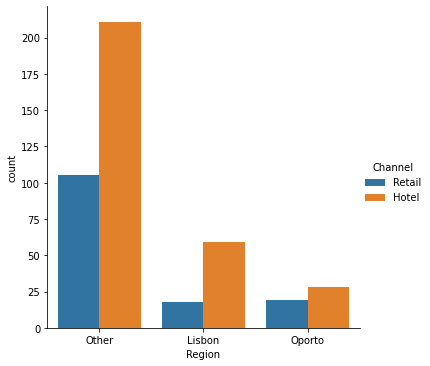

In [415]:
sns.catplot(x="Region",hue="Channel", kind="count", data=df1)

Ans for 1:1: As per above Count plot, Other Region and Hotel Channel seems to spend more,
                                      Oporto Region and Retail Channel seems to spend less. 
                                     

# 1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel? Provide justification for your answer

In [257]:
pivot_df1=pd.pivot_table(df1, index=[],
                     columns=['Channel', 'Region'], aggfunc=np.sum, margins=True).T
pivot_df1

Delicatessen  Detergents_Paper    Fresh   Frozen  Grocery  \
Channel Region                                                              
Hotel   Lisbon         70632             56081   761233   184512   237542   
        Oporto         30965             13516   326215   160861   123074   
        Other         320358            165990  2928269   771606   820101   
        All           421955            235587  4015717  1116979  1180717   
Retail  Lisbon         33695            148055    93600    46514   332495   
        Oporto         23541            159795   138506    29271   310200   
        Other         191752            724420  1032308   158886  1675150   
        All           248988           1032270  1264414   234671  2317845   

                   Milk  
Channel Region           
Hotel   Lisbon   228342  
        Oporto    64519  
        Other    735753  
        All     1028614  
Retail  Lisbon   194112  
        Oporto   174625  
        Other   1153006  
        All     1521743

Few observations listed below as per above Pivot Table,

1. Overall Retail business has more revenue compared to Hotel Business. 
2. Behaviour of all varieties are different in all Hotel and Retail Business. 
3. Delicatessan item have given highest revenue in hotel business especially in other region. 


# 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

Coefficient of Variation = population standard deviation // Population mean

We performed Coeffient of Variation for all items from Summary table 

Coefficient of Variation for Fresh = 1.05

Coefficient of Variation for Milk = 1.27

Coefficient of Variation for Frozen = 1.58

Coefficient of Variation for Grocery = 1.19

Coefficient of Variation for Detergents_Paper = 1.65

Coefficient of Variation for Delicatessen = 1.84

The least value is of Fresh item = 1.05. So least inconsistent behavior shown by item – Fresh 


Highest value is Category Delicatessen = 1.84. So most inconsistent behavior shown by item – Delicatessen



# 1.4 Are there any outliers in the data?

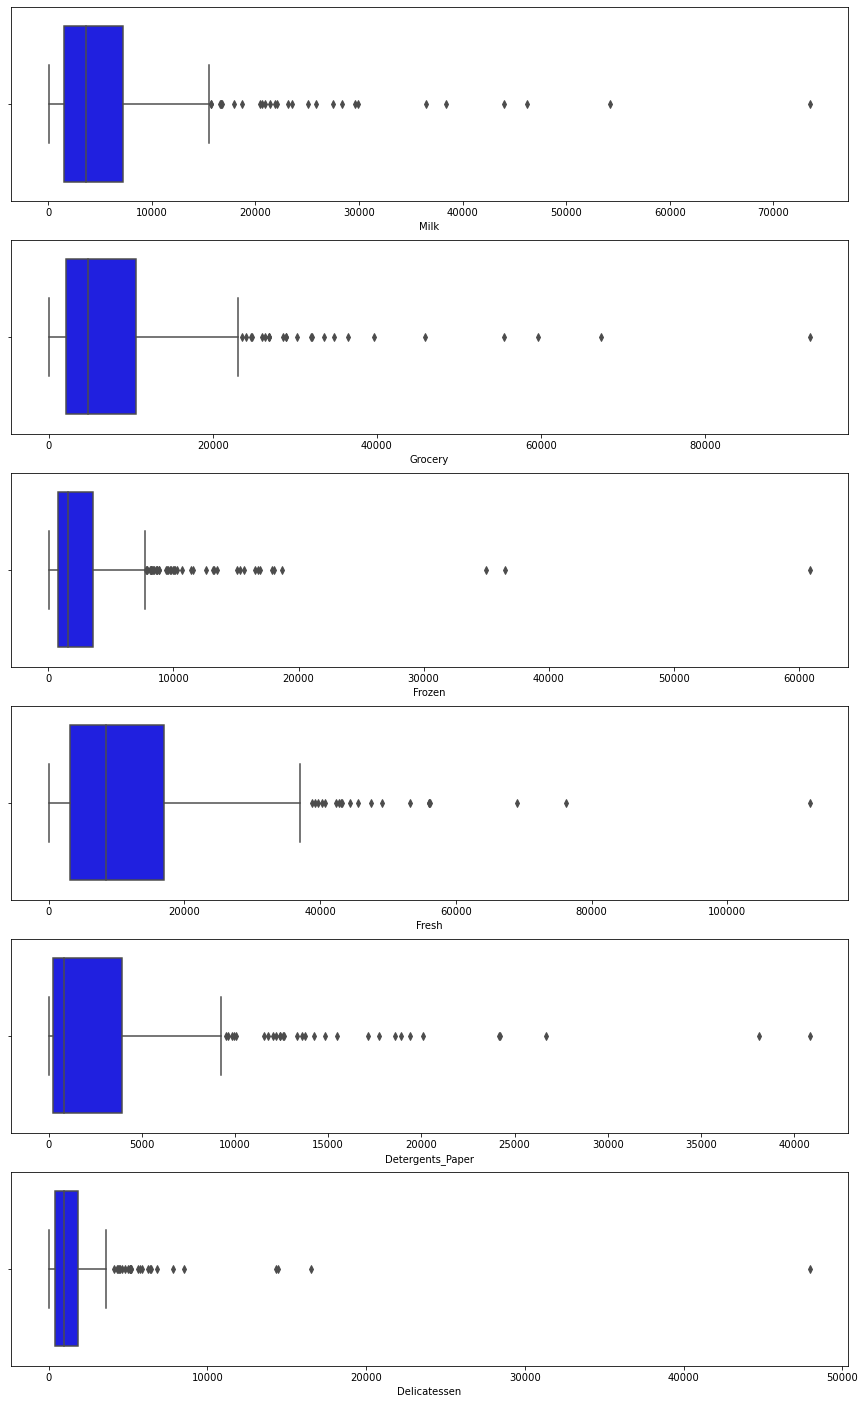

In [416]:
plt.figure(figsize= (15,25))
plt.subplot(6,1,1)
sns.boxplot(x= df1.Milk, color='blue')

plt.subplot(6,1,2)
sns.boxplot(x= df1.Grocery, color='blue')

plt.subplot(6,1,3)
sns.boxplot(x= df1.Frozen, color='blue')

plt.subplot(6,1,4)
sns.boxplot(x= df1.Fresh, color='blue')

plt.subplot(6,1,5)
sns.boxplot(x= df1.Detergents_Paper, color='blue')

plt.subplot(6,1,6)
sns.boxplot(x= df1.Delicatessen, color='blue')

plt.show()

There are outliers present in the all items.

All items are right skewed except Delicatessan. 

# 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

1. Compared to all items, We have highest revenue from Grocery of Retail market in the Lisbon region. 
2. In same way, we have least revenue from Detergents_Paper of Hotel in the Oporto region.
3. Need to develop business on other items than Grocery and Fresh. 
4. Spending of Hotel and Retail channel are totally different which should be higher or slightly equal. 


# Problem 2 

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

2.1.2. Gender and Grad Intention

2.1.3. Gender and Employment

2.1.4. Gender and Computer

2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

2.2.2. What is the probability that a randomly selected CMSU student will be female?

2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.

2.3.2 Find the conditional probability of different majors among the female students of CMSU.

2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?

2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.6.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

2.6.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

In [422]:
projectdata2 = pd.read_csv("C:/Users/baska/Downloads/Survey-1.csv")
#Reading file

In [423]:
projectdata2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [424]:
projectdata2.info()
#checking for Rows & columns, Non-null values and Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [425]:
projectdata2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62,NaN,NaN,NaN,31.5,18.0416,1,16.25,31.5,46.75,62
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62,NaN,NaN,NaN,21.129,1.43131,18,20,21,22,26
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62,NaN,NaN,NaN,3.12903,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62,NaN,NaN,NaN,48.5484,12.0809,25,40,50,55,80
Social Networking,62,NaN,NaN,NaN,1.51613,0.844305,0,1,1,2,4


# 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

2.1.2. Gender and Grad Intention

2.1.3. Gender and Employment

2.1.4. Gender and Computer

In [426]:
pd.crosstab(projectdata2['Gender'],projectdata2['Major'] )

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [427]:
pd.crosstab(projectdata2['Gender'],projectdata2['Grad Intention'] )

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [428]:
pd.crosstab(projectdata2['Gender'],projectdata2['Employment'] )

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [429]:
pd.crosstab(projectdata2['Gender'],projectdata2['Computer'] )

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


# 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [430]:
df_2= projectdata2.groupby(['Gender']).size()
print("The number of male in this Dataset under the Gender column is:",df_2[1],
     "\n whereas The number of Females in this Dataset under the Gender column is:", df_2[0])


The number of male in this Dataset under the Gender column is: 29 
 whereas The number of Females in this Dataset under the Gender column is: 33


In [431]:
df_Prob = df_2[1] + df_2[0]
df_Prob

62

In [432]:
Prob_male =  round(df_2[1]/df_Prob,4)*100

print('Probability that a randomly selected CMSU student will be male. is %1.2f' % Prob_male + "%")

Probability that a randomly selected CMSU student will be male. is 46.77%


In [433]:
Prob_Female =  round(df_2[0]/df_Prob,4)*100

print('Probability that a randomly selected CMSU student will be Female. is %1.2f' % Prob_Female + "%")

Probability that a randomly selected CMSU student will be Female. is 53.23%


# 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.

2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [434]:
pd.crosstab(projectdata2['Gender'],projectdata2['Major'], margins = True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [435]:
Male_Accounting=4
Total_Male=29
Prob_Male_Accounting = round(Male_Accounting/Total_Male,4)*100
print('Probability of Male selecting Accounting. is %1.1f' % Prob_Male_Accounting +'%')

Probability of Male selecting Accounting. is 13.8%


In [436]:
Male_CIS=1
Total_Male=29
Prob_Male_CIS = round(Male_CIS/Total_Male,4)*100
print('Probability of Male selecting CIS. is %1.1f' % Prob_Male_CIS  +'%')

Probability of Male selecting CIS. is 3.5%


In [437]:
Male_CIS=1
Total_Male=29
Prob_Male_CIS = round(Male_CIS/Total_Male,4)*100
print('Probability of Male selecting CIS. is %1.1f' % Prob_Male_CIS  +'%')

Probability of Male selecting CIS. is 3.5%


In [438]:
Male_EconomicsFinance=4
Total_Male=29
Prob_Male_EconomicsFinance = round(Male_EconomicsFinance/Total_Male,4)*100
print('Probability of Male selecting EconomicsFinance. is %1.1f' % Prob_Male_EconomicsFinance +'%')

Probability of Male selecting EconomicsFinance. is 13.8%


In [439]:
Male_International_business=2
Total_Male=29
Prob_Male_International_business = round(Male_International_business/Total_Male,4)*100
print('Probability of Male selecting International_business. is %1.1f' % Prob_Male_International_business  +'%')

Probability of Male selecting International_business. is 6.9%


In [440]:
Male_Management=6
Total_Male=29
Prob_Male_Management = round(Male_Management/Total_Male,4)*100
print('Probability of Male selecting Management. is %1.1f' % Prob_Male_Management  +'%')

Probability of Male selecting Management. is 20.7%


In [441]:
Male_other=4
Total_Male=29
Prob_Male_other = round(Male_other/Total_Male,4)*100
print('Probability of Male selecting other business. is %1.1f' % Prob_Male_other  +'%')

Probability of Male selecting other business. is 13.8%


In [442]:
Male_Retail=5
Total_Male=29
Prob_Male_Retail = round(Male_Retail/Total_Male,4)*100
print('Probability of Male selecting Retail business. is %1.1f' % Prob_Male_Retail  +'%')

Probability of Male selecting Retail business. is 17.2%


In [443]:
Male_undecided=3
Total_Male=29
Prob_Male_undecided= round(Male_undecided/Total_Male,4)*100
print('Probability of Male not decided. is %1.1f' % Prob_Male_undecided  +'%')

Probability of Male not decided. is 10.3%


In [444]:
Female_Accounting=3
Total_Female=33
Prob_Female_Accounting = round(Female_Accounting/Total_Female,4)*100
print('Probability of Female selecting Accounting. is %1.1f' % Prob_Female_Accounting +'%')

Probability of Female selecting Accounting. is 9.1%


In [445]:
Female_CIS=3
Total_Female=33
Prob_Female_CIS = round(Female_CIS/Total_Female,4)*100
print('Probability of Female selecting CIS. is %1.1f' % Prob_Female_CIS +'%')

Probability of Female selecting CIS. is 9.1%


In [446]:
Female_Ecomonicsfinance=7
Total_Female=33
Prob_Female_Ecomonicsfinance= round(Female_Ecomonicsfinance/Total_Female,4)*100
print('Probability of Female selecting Ecomonicsfinance. is %1.1f' % Prob_Female_Ecomonicsfinance +'%')

Probability of Female selecting Ecomonicsfinance. is 21.2%


In [447]:
Female_Internationbusiness=4
Total_Female=33
Prob_Female_Internationbusiness= round(Female_Internationbusiness/Total_Female,4)*100
print('Probability of Female selecting International business. is %1.1f' % Prob_Female_Internationbusiness +'%')

Probability of Female selecting International business. is 12.1%


In [448]:
Female_Management=4
Total_Female=33
Prob_Female_Management= round(Female_Management/Total_Female,4)*100
print('Probability of Female selecting Management. is %1.1f' % Prob_Female_Management + '%')

Probability of Female selecting Management. is 12.1%


In [449]:
Female_other=3
Total_Female=33
Prob_Female_other= round(Female_other/Total_Female,4)*100
print('Probability of Female selecting other. is %1.1f' % Prob_Female_other + '%')

Probability of Female selecting other. is 9.1%


In [450]:
Female_Retailing=9
Total_Female=33
Prob_Female_Retailing= round(Female_Retailing/Total_Female,4)*100
print('Probability of Female selecting Retailing. is %1.1f' % Prob_Female_Retailing + '%')

Probability of Female selecting Retailing. is 27.3%


In [451]:
Female_undecided=0
Total_Female=33
Prob_Female_undecided= round(Female_undecided/Total_Female,4)*100
print('Probability of Female selecting not decided. is %1.1f' % Prob_Female_undecided + '%')

Probability of Female selecting not decided. is 0.0%


# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [452]:
pd.crosstab(projectdata2['Gender'],projectdata2['Grad Intention'], margins = True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [453]:
Male_Intent=17
Total_Gender=62
Prob_Male_Intent= round(Male_Intent/Total_Gender,4)*100
print('Probability of male intends to Graduate. is %1.1f' % Prob_Male_Intent + '%')

Probability of male intends to Graduate. is 27.4%


In [454]:
pd.crosstab(projectdata2['Gender'],projectdata2['Computer'], margins = True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [455]:
Female_nolaptop=4
Total_Gender=62
Prob_Female_no_Laptop= round(Female_nolaptop/Total_Gender,4)*100
print('Probability of Female doesnt have laptop. is %1.1f' % Prob_Female_no_Laptop + '%')

Probability of Female doesnt have laptop. is 6.5%


# 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?

2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [456]:
pd.crosstab(projectdata2['Gender'],projectdata2['Employment'], margins = True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


**P(A or B) = P(A) + P(B) - P(A and B)**


In [457]:
P_male= round(29/62,4)*100
P_Fulltime = round(10/62,4)*100
P_male_fulltime = round(7/62,4)*100
Prob = P_male + P_Fulltime - P_male_fulltime

print('Probability that a randomly chosen student is either a male or has full-time employment.is %1.1f' % Prob + '%')

Probability that a randomly chosen student is either a male or has full-time employment.is 51.6%


In [458]:
pd.crosstab(projectdata2['Gender'],projectdata2['Major'], margins = True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [459]:
P_Female_Internationalbusiness= round(4/6,4)*100
P_Female_Management = round(4/10,4)*100
P_Female_Inter_Management = round(16/62,4)*100
Prob1 = P_Female_Internationalbusiness + P_Female_Management - P_Female_Inter_Management

print('Probability that given a female student is randomly chosen  and she is majoring in international business or management.is %1.1f' % Prob1 + '%')

Probability that given a female student is randomly chosen  and she is majoring in international business or management.is 80.9%


# 2.6. Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

Answer the following questions based on the data

2.6.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

2.6.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [483]:
P_Gender_Grad = pd.crosstab(projectdata2['Gender'],projectdata2['Grad Intention'], margins = True)

P_Gender_Grad_Yesno = P_Gender_Grad.drop(columns="Undecided")

P_Gender_Grad_Yesno

Grad Intention,No,Yes,All
Gender,,,
Female,9,11,33
Male,3,17,29
All,12,28,62


In [484]:
Prob_female = round(20/33,4)
Prob_female

0.6061

In [485]:
Prob_total = round(33/62,4)
Prob_female

0.6061

In [486]:
print("Graduate intention and being female are independent events",)

Graduate intention and being female are independent events


# 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.6.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

2.6.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [487]:
df_gpa = projectdata2[['GPA']]

df_gpa

,GPA
0,2.9
1,3.6
2,2.5
3,2.5
4,2.8
...,...
57,2.4
58,2.9
59,2.5
60,3.5


In [492]:
df_GPA1 = pd.DataFrame(df_gpa,columns=['GPA'])

df_GPA1.loc[df_GPA1['GPA'] <= 3, 'Lower than 3?'] = 'True'

print (df_GPA1)

    GPA Lower than 3?
0   2.9          True
1   3.6           NaN
2   2.5          True
3   2.5          True
4   2.8          True
..  ...           ...
57  2.4          True
58  2.9          True
59  2.5          True
60  3.5           NaN
61  3.2           NaN

[62 rows x 2 columns]


# Problem 3:
An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.



In [388]:
projectdata3 = pd.read_csv("C:/Users/baska/Downloads/A+&+B+shingles.csv")

In [389]:
projectdata3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [396]:
from scipy.stats import   ttest_1samp, ttest_ind
import statsmodels.stats.api as sm

In [397]:
projectdata3_A = projectdata3.drop(columns="B")

projectdata3_A.head()

,A
0,0.44
1,0.61
2,0.47
3,0.30
4,0.15


### Step 1: Define null and alternative hypotheses for SAMPLE A

In testing the average weight of A.

#### Null hypothesis states that mean  weight, $\mu$ is equals to 0.35.
#### Alternative hypothesis states that the mean weight, $\mu$ is less than 0.35.

* $H_0$: $\mu$ = 0.35
* $H_A$: $\mu$ less than 0.35

Here we select $\alpha$ = 0.05.

The sample size for this A measurement is 36

In [398]:
t_statistic, p_value = ttest_1samp(projectdata3_A, 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test 
t statistic: [-1.47350463] p value: [0.07477633] 


Comments: As per above result, p Value > 0.05. Hence do not reject Null Hypothesis. No enough evidence to confirm the mean moisture content of A Shingles is less than 0.35 pounds per 100 square feet. p-value = 0.074. 

### Step 2: Define null and alternative hypotheses for SAMPLE B



# In testing the average weight of B.

#### Null hypothesis states that mean  weight, $\mu$ is equals to 0.35.
#### Alternative hypothesis states that the mean weight, $\mu$ is less than 0.35.

* $H_0$: $\mu$ = 0.35
* $H_B$: $\mu$ less than 0.35

Here we select $\alpha$ = 0.05.

In [399]:
projectdata3_B = projectdata3.drop(columns="A")

projectdata3_B.head()

,B
0,0.14
1,0.15
2,0.31
3,0.16
4,0.37


In [400]:
t_statistic, p_value = ttest_1samp(projectdata3_B, 0.35, nan_policy='omit' )
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test 
t statistic: [-3.1003313069986995] p value: [0.0020904774003191826] 


In [407]:
projectdata3_B.mean()

B    0.273548
dtype: float64

Ans 3.1: Comments: As per above result, p Value < 0.05. Hence reject Null Hypothesis. There is sufficient evidence to confirm the mean moisture content of B Shingles is less than 0.35 pounds per 100 square feet. p-value = 0.002. 

Probability of sample observation of B shingles(n =31) where the sample B mean moisture content is 0.2735 pounds per 100 square feet.

# 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?


# Step 1: Define null and alternative hypotheses (Two Tail Hypothesis)

# * $H_0$:   $\mu{A}$ = $\mu{B}$
* $H_A$:   $\mu{A}$ $\neq$ $\mu{B}$

Here we select $\alpha$ = 0.05 and the population standard deviation is not known.

We have two samples and we do not know the population standard deviation.

In [402]:
t_statistic,p_value=ttest_ind(projectdata3['A'],projectdata3['B'],equal_var=True ,nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',p_value)   

tstat 1.2896282719661123
P Value 0.2017496571835306


Ans: As per above analysis, pValue >0.05. So do not reject Ho. There is no sufficient evidence to reject Ho. We conclude that population mean for shingles A and B are equal by two tail test.